<a href="https://colab.research.google.com/github/oliva0620/23bigdata_exam/blob/cs/%5BML_01%5D_basic_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.Machine Learning 과정

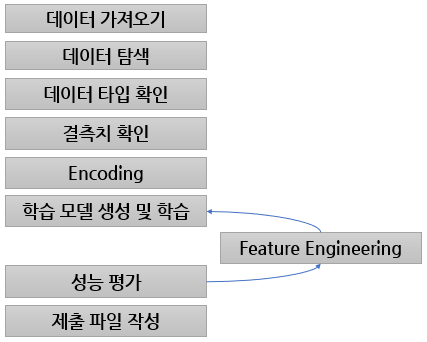

## 1.Machine Learning - 전처리

### 1-1.문제지와 실제 dtype차이 확인
**문제지 요구사항에 제시된 column의 dtype이 file에서 읽어온 데이터와 동일한지 확인하여 문제지에 제시된 것에 맞도록 변환**
 - 숫자가 아닌 문자가 포함되어 있는 경우 object로 표기되며 이때는 해당 문자를 찾아 없애야 함
    - 일단 astype('int'), astype('float') 등을 사용하여 변환해 보고,   무엇 때문에 변환이 안되는지 오류 메시지를 확인함
    - 오류메시지에 따라 불필요한 문자를 제거함 (Series.replace(regex=True) 또는 Series.str.replace() 사용)
    - astype()을 사용하여 숫자형 데이터로 변경함

- 날짜/시간 데이터의 경우 pd.to_datetime(Series, format='%Y%m%d') 를 사용하면 문제없이 변환 가능
    - 일반적인 날짜/시간 형식은 astype('datetime64')로 변경 가능




In [ ]:
import pandas as pd

data = {'point': ['1', '*2', '3', '*4', '1'],
        'date': ['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06'],
        'gender': ['F', 'M', 'M', 'F', 'M']}
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   point   5 non-null      object
 1   date    5 non-null      object
 2   gender  5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [ ]:
#df['point'].replace('\*', '', regex=True).astype('int64')
#df['date'].astype('datetime64')
df['point_num'] = df['point'].str.replace('*', '').astype('int64')
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   point      5 non-null      object        
 1   date       5 non-null      object        
 2   gender     5 non-null      object        
 3   point_num  5 non-null      int64         
 4   datetime   5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


### 1-2.모든 column의 dtype 확인
**Machine Learning을 위한 column의 dtype은 int 또는 float 이어야 한다**
- 범주형 데이터는 LabelEncoding 또는 OneHotEncoding을 사용하여 수치형으로 변경
- 날짜/시간 데이터는 dt를 사용하여 year, month, day, hour, weekdays, quarter .. 등 정보를 분할하여 Feature로 사용함
   - 분할 정보의 nunique() 가 1이거나 var() 가 0 값인 것은 의미 없으므로 Feature로 사용하지 않음

In [ ]:
df['point_num'] = df['point'].str.replace('*', '').astype('int64')
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#print(df['datetime'].dt.year.var())
df['day'] = df['datetime'].dt.day
df['gender_LE'] = df['gender'].replace({'F':0, 'M':1})
df2 = df[['point_num', 'day', 'gender_LE']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   point_num  5 non-null      int64
 1   day        5 non-null      int64
 2   gender_LE  5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


### 1-3.train, test 데이터
**train, test 데이터는 세 개의 파일로 나뉘어 제공됨**
- train 데이터 : 학습용 데이터, X_train.csv, Y_train.csv
    - 학습 모델을 만들 때 사용
    - 성능 예측을 위해 2개 나누어 사용 또는 GridSearchCV 사용
- test 데이터 : 평가용 데이터, X_test.csv
    - 제출 용도의 파일 작성에 사용
    - train 데이터로 생성된 학습 모델을 사용하여 평가용 파일 작성
- train, test 데이터의 X(입력) Feature
    - 동일한 가공 처리가 되어야 함
    - Feature 순서, 개수가 동일해야 함
    - 2차원의 형태이어야 함
- train 데이터의 Y(출력, target)은 한 개의 column으로 1차원 형태이어야 함
- train, test 데이터가 서로 섞여서는 안됨
- test 데이터는 그 행의 순서나 개수가 변경되어서는 안됨 (shuffle, drop 금지)


### 1-4.결측치(NA Value)
- Machine Learning에 사용되는 데이터는 결측치를 가지고 있으면 안됨
- train, test 데이터를 보고 양쪽에 결측치가 있는 경우 채우기를 실행하고,
- train 데이터만 결측치가 있는 경우 삭제/채우기 등 원하는 처리를 할 수 있음

### 1-5.평가 결과 제출
- 원하는 의도를 잘 파악하여 파일에 쓰기 하여 제출해야 함
- 다양한 평가 도구를 사용할 수 있어야 하며, 결과를 파일에 저장할 수 있어야 함


### 1-6.도움말 사용법
- sklearn에서 사용할 도구의 import 방법을 암기
- dir(), help() 등의 기능을 잘 사용하도록 함


## 2.Mini Project - 자녀의 키 예측
- 부모의 키를 사용하여 자녀의 키를 예측하는 회귀 모델 작성

### 2-1.아들키 예측

In [ ]:
import pandas as pd

data_train = {'아빠' : [175, 180, 172, 174, 178, 168, 173, 177],
              '엄마' : [160, 158, 155, 161, 163, 160, 168, 167],
              '아들' : [178, 182, 175, 180, 183, 174, 179, 183],
              '딸' : [163, 168, 157, 164, 167, 158, 169, 169]}
df = pd.DataFrame(data_train)
df.index.name = 'id'
df[['아빠', '엄마']].to_csv('X_train.csv')
df[['아들']].to_csv('Y1_train.csv')
df[['딸']].to_csv('Y2_train.csv')

data_test = {'아빠' : [174, 179, 180],
             '엄마' : [160, 160, 160]}
df2 = pd.DataFrame(data_test)
df2.index.name = 'id'   
df2.to_csv('X_test.csv')     

In [ ]:
# [0] train, test 파일 가져오기
X_train = pd.read_csv('X_train.csv')
Y1_train = pd.read_csv('Y1_train.csv')
X_test = pd.read_csv('X_test.csv')

In [ ]:
print(X_test)

   id   아빠   엄마
0   0  174  160
1   1  179  160
2   2  180  160


- DataFrame.corr() : 각 Feature 간 상관관계를 확인할 수 있는 DataFrame을 생성함
- -1 ~ 1의 사이 값을 갖으며, 0인 경우 상관관계가 없는 것임

In [ ]:
# [1] 아빠, 엄마, 아들 키의 상관관계
df = X_train.copy()
df['아들'] = Y1_train['아들']
print(df.corr())

          id        아빠        엄마        아들
id  1.000000 -0.223880  0.773127  0.168862
아빠 -0.223880  1.000000  0.133983  0.895192
엄마  0.773127  0.133983  1.000000  0.491595
아들  0.168862  0.895192  0.491595  1.000000


In [ ]:
df.corr()

,id,아빠,엄마,아들
id,1.000000,-0.223880,0.773127,0.168862
아빠,-0.223880,1.000000,0.133983,0.895192
엄마,0.773127,0.133983,1.000000,0.491595
아들,0.168862,0.895192,0.491595,1.000000


- X : 아빠, 엄마의 키
- Y1 : 아들의 키
- Y2 : 딸의 키

In [ ]:
# [2] 데이터 지정하기
# 아빠, 엄마의 키를 사용해 아들의 키를 예측 (X=[아빠, 엄마], Y1=[아들])
X = df[['아빠', '엄마']]
Y1 = df['아들']
print(Y1)

In [ ]:
# [3] 아들 키를 예측하는 모델 만들어 분석하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y1)

LinearRegression()

In [ ]:
# [4] 아들 모델 성능 평가하기
model.score(X, Y1)

0.9420204329984175

In [ ]:
# [5] 결과를 표로 작성하기 (예측, 오차)
result = df[['아빠', '엄마','아들']]
result['아들예측'] = model.predict(X)
result['아들오차'] = result['아들'] - result['아들예측']
result

,아빠,엄마,아들,아들예측,아들오차
0,175,160,178,179.091446,-1.091446
1,180,158,182,182.354761,-0.354761
2,172,155,175,175.281252,-0.281252
3,174,161,180,178.618029,1.381971
4,178,163,183,182.304154,0.695846
5,168,160,174,173.686325,0.313675
6,173,168,179,179.937067,-0.937067
7,177,167,183,182.726965,0.273035


In [ ]:
# [6] 새로운 데이터로 예측하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
아들키 = model.predict(data)
print(f'아들의 예상키는 {아들키[0]}입니다')

아빠키를 입력해 주세요 : 187
엄마키를 입력해 주세요 : 160
아들의 예상키는 188.35736703948874입니다


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# [7] 새로운 데이터로 확인하기 - X_test.csv 로 확인하기
Xt = X_test[['아빠', '엄마']]
print(Xt)
model.predict(Xt)

    아빠   엄마
0  174  160
1  179  160
2  180  160


array([178.31928593, 182.18008636, 182.95224644])

### 2-2.직접 작업해 보세요
- 아들키 예측 프로그램을 보고 딸키 예측 프로그램 만들기

In [ ]:
# [0] train, test 파일 가져오기 - 'X_train.csv', 'Y2_train.csv', 'X_test.csv' 사용
X_train = pd.read_csv('X_train.csv')
Y2_train = pd.read_csv('Y2_train.csv')
X_test = pd.read_csv('X_test.csv')

In [ ]:
# [1] 아빠, 엄마, 아들 키의 상관관계 확인
df = X_train.copy()
df['딸'] = Y2_train['딸']
print(df)

   id   아빠   엄마    딸
0   0  175  160  163
1   1  180  158  168
2   2  172  155  157
3   3  174  161  164
4   4  178  163  167
5   5  168  160  158
6   6  173  168  169
7   7  177  167  169


In [ ]:
# [2] 데이터 지정하기
# 아빠, 엄마의 키를 사용해 딸의 키를 예측 (X=[아빠, 엄마], Y2=[딸])
X = df[['아빠', '엄마']]
Y2 = df['딸']

In [ ]:
# [3] 딸 키를 예측하는 모델 만들기 (LinearRegression 사용)
# 모델이름을 model_d 로 사용해 주세요.
from sklearn.linear_model import LinearRegression
model_d = LinearRegression()
model_d.fit(X, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# [4] 딸모델 성능 평가하기
model_d.score(X, Y2)

0.9458421428757123

In [ ]:
# [5] 딸모델의 예측 값, 오차 확인
result = df[['아빠', '엄마', '딸']]
result['딸예측'] = model_d.predict(X)
result['딸오차'] = result['딸'] - result['딸예측']
result

,아빠,엄마,딸,딸예측,딸오차
0,175,160,163,163.634730,-0.634730
1,180,158,168,166.355075,1.644925
2,172,155,157,157.665754,-0.665754
3,174,161,164,163.510348,0.489652
4,178,163,167,168.204748,-1.204748
5,168,160,158,157.867705,0.132295
6,173,168,169,167.582839,1.417161
7,177,167,169,170.178802,-1.178802


In [ ]:
# [6] 새로운 데이터로 확인하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
딸키 = model_d.predict(data)
print(f'딸의 예상키는 {딸키[0]}입니다')

아빠키를 입력해 주세요 : 170
엄마키를 입력해 주세요 : 150
딸의 예상키는 152.5206383626265입니다


In [ ]:
# [7] 새로운 데이터로 확인하기 - X_test.csv 로 확인하기
Xt = X_test[['아빠', '엄마']]
print(Xt)
model_d.predict(Xt)

    아빠   엄마
0  174  160
1  179  160
2  180  160


array([162.8108689 , 166.93017195, 167.75403256])

### 2-3.기울기(회귀계수), 절편확인, 객체를 파일로 저장

In [ ]:
# [1] 기울기, 절편 확인하기
# Y1 = a1*X['아빠']  + a2*X['엄마'] + b
print(model.coef_)
print(model.intercept_)

[0.77216009 0.29874268]
-3.8353971695960922


In [ ]:
아빠키를 입력해 주세요 : 176
엄마키를 입력해 주세요 : 160
아들의 예상키는 179.8636061021076입니다

In [ ]:
Yh = 0.77216009 * 176 + 0.29874268 * 160 + -3.8353971695960922
print(Yh)

179.8636074704039


In [ ]:
# [2] 모델 저장하기
import shelve

with shelve.open('height') as data:
    data['model_son'] = model
    data['model_daughter'] = model_d
print('저장완료') 

저장완료


In [ ]:
# [3] 모델 불러오기
import shelve

with shelve.open('height') as data:
    A = data['model_son']
    B = data['model_daughter']
print('불러오기 완료') 

불러오기 완료


In [ ]:
# [4] 새로운 데이터로 확인하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
아들키 = A.predict(data)
print(f'딸의 예상키는 {아들키[0]}입니다')

아빠키를 입력해 주세요 : 176
엄마키를 입력해 주세요 : 160
딸의 예상키는 179.8636061021076입니다


^^!  데이터가 부실하며(?!) 이상치(Outlier)도 없기 때문에 결과를 믿으시면 아니됩니다!